### I. Loading dataset
Loading `Diabetes` dataset from `Scikit-Learn`: https://scikit-learn.org/stable/datasets/toy_dataset.html

In [4]:
from sklearn import datasets

In [5]:
diabetes = datasets.load_diabetes()

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
diabetes.data.shape

(442, 10)

In [8]:
diabetes.target.shape

(442,)

In [9]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### II. Exploring Data with Pandas

In [10]:
import pandas as pd

In [11]:
pd.set_option('display.precision', 4)

In [12]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['Progression'] = pd.Series(diabetes.target)

In [13]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0


In [14]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-2.5118e-19,1.2308e-17,-2.2456e-16,-4.7976e-17,-1.3815e-17,3.9184e-17,-5.7772e-18,-9.0425e-18,9.2686e-17,1.1303e-17,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,-1.2678e-01,-1.1561e-01,-1.0231e-01,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,-3.4248e-02,-3.0358e-02,-3.5117e-02,-3.9493e-02,-3.3246e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6704e-03,-4.3209e-03,-3.8191e-03,-6.5845e-03,-2.5923e-03,-1.9472e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,2.8358e-02,2.9844e-02,2.9312e-02,3.4309e-02,3.2432e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,1.5391e-01,1.9879e-01,1.8118e-01,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


### III. Visualizing the Features

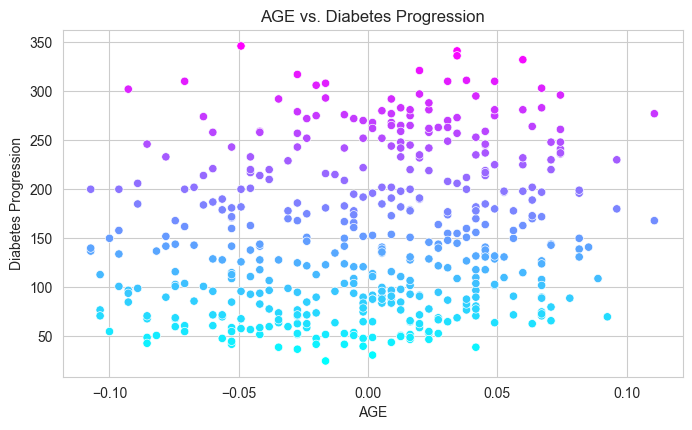

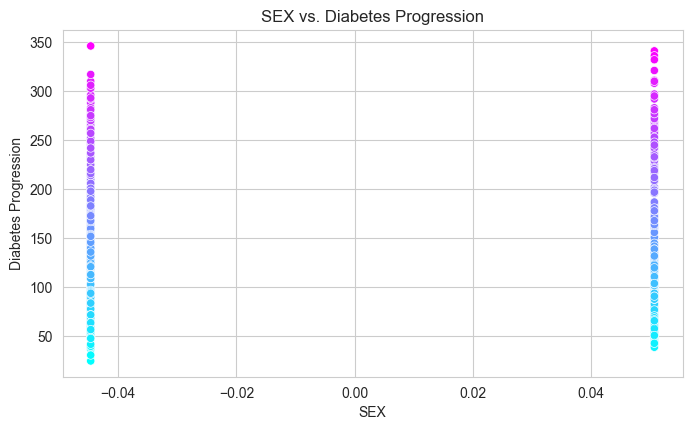

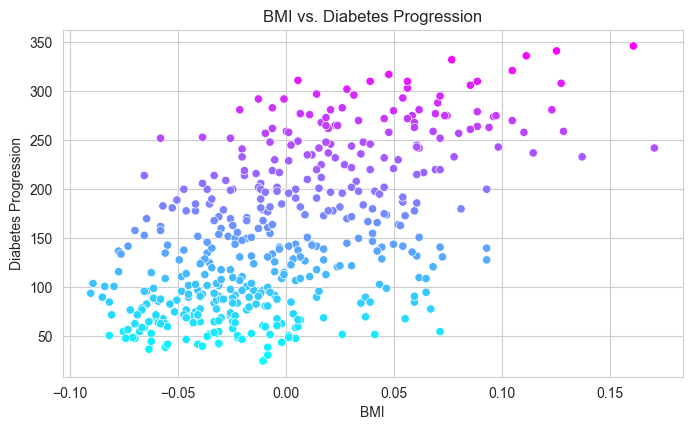

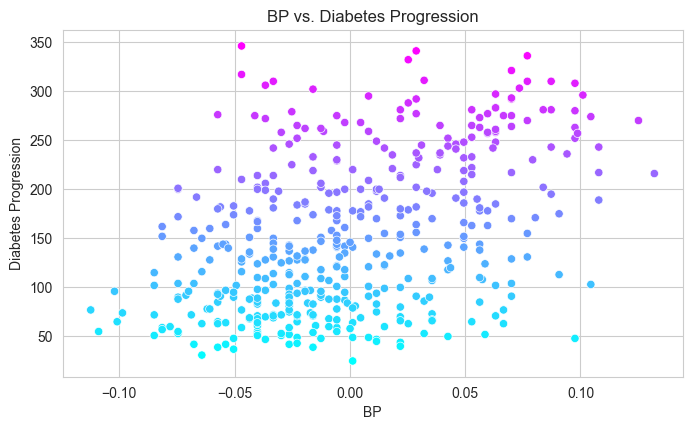

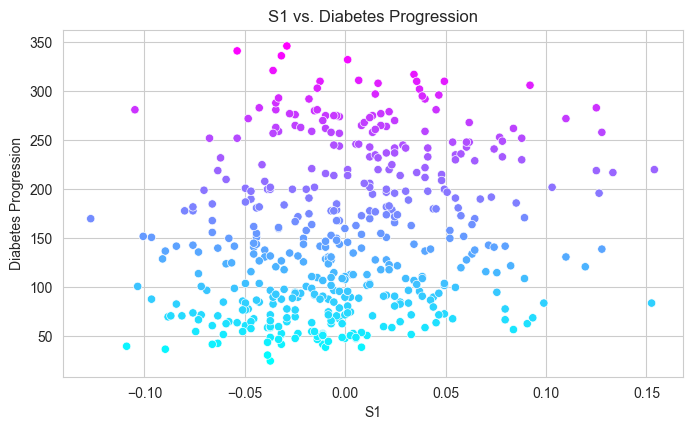

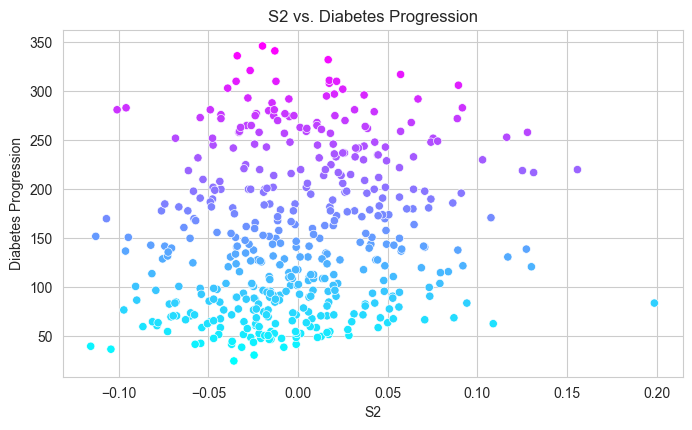

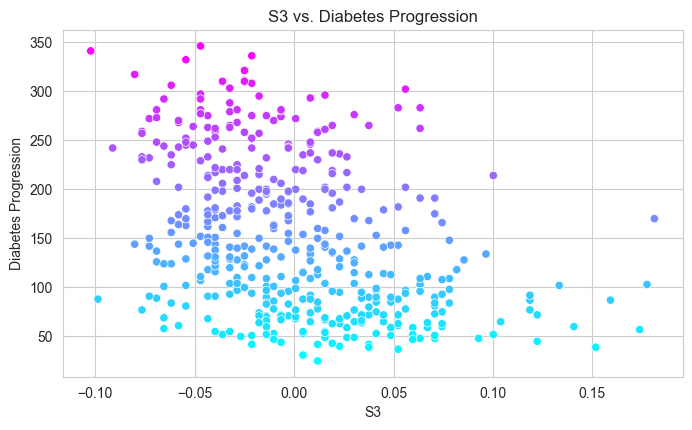

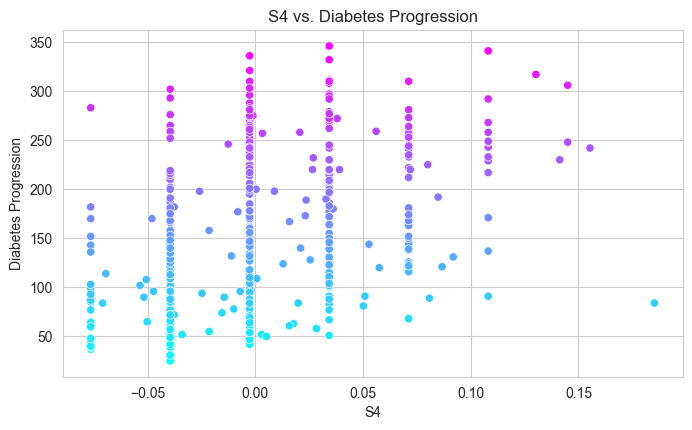

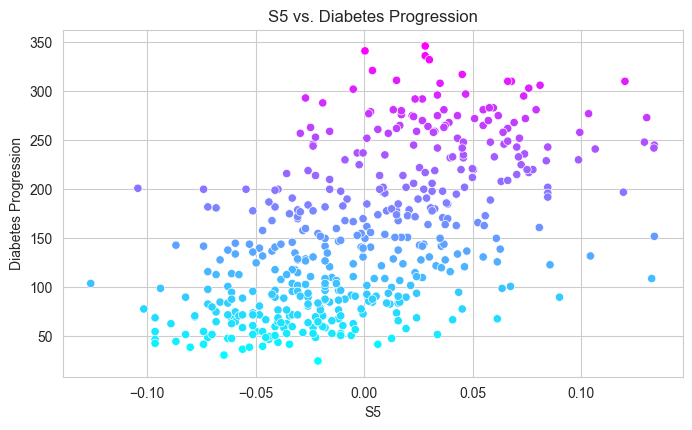

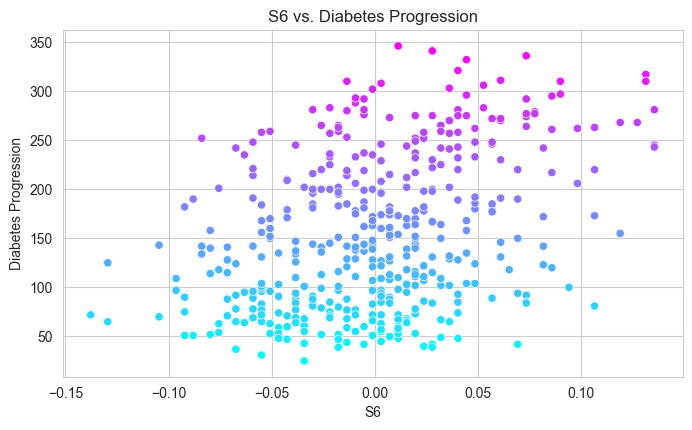

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Build dataframe with features + target for visualization (ensures 'Progression' exists)
viz_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
viz_df['Diabetes Progression'] = diabetes.target
sample_df = viz_df.sample(frac=0.1, random_state=17)

# Plot disease progression (target) against each feature
for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5))
    sns.scatterplot(data=viz_df, x=feature, y='Diabetes Progression',
                    hue='Diabetes Progression', palette='cool', legend=False)
    plt.title(f"{feature.upper()} vs. Diabetes Progression")
    plt.xlabel(feature.upper())
    plt.show()

### IV. Splitting the Data for Training and Testing
Using `train_test_split` to partition the data into training and test sets.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=11)

In [55]:
X_train.shape, X_test.shape

((331, 10), (111, 10))

### V. Training the Model
Using **`LinearRegression`** to fit a multiple linear regression model with all features.

In [56]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [57]:
# Coefficients for each feature and intercept
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]:.4f}')
print(f'{"intercept":>10}: {linear_regression.intercept_:.4f}')

       age: -60.2198
       sex: -266.4571
       bmi: 523.0634
        bp: 310.5135
        s1: -336.1615
        s2: 137.3393
        s3: -131.1392
        s4: -1.1492
        s5: 622.3287
        s6: 60.4665
 intercept: 152.2282


### VI. Testing the Model
Using the estimator's `predict` method on the test set.

In [58]:
predicted = linear_regression.predict(X_test)
expected = y_test

predicted[:5], expected[:5]  # first 5 predictions vs actual

(array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
         72.72122197]),
 array([ 79.,  55., 109., 178.,  39.]))

### VII. Visualizing Expected vs. Predicted Values
Scatter plot of expected (actual) vs predicted disease progression. Points on the dashed line would be perfect predictions.

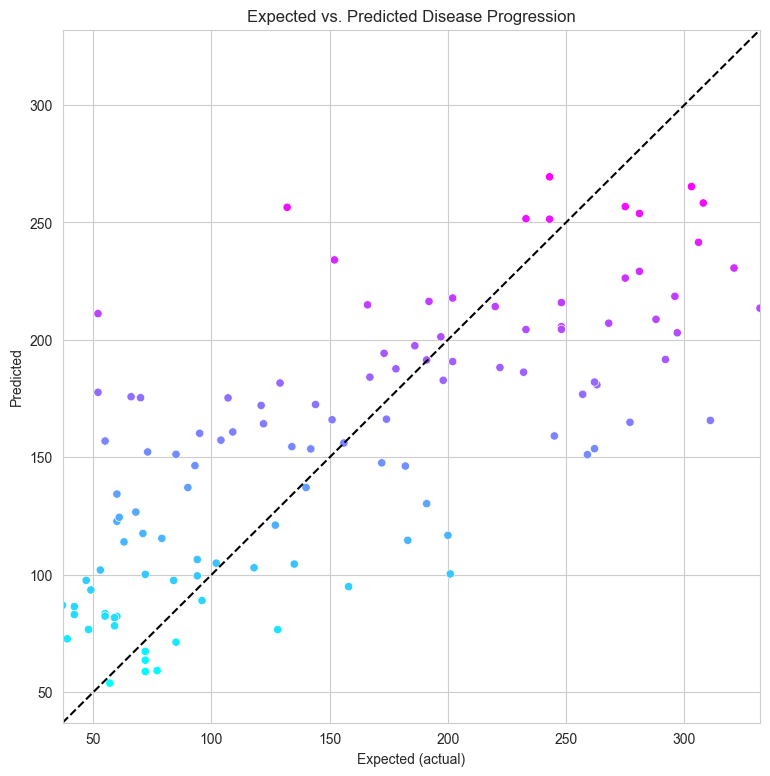

In [59]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
plt.plot([start, end], [start, end], 'k--')
plt.xlabel('Expected (actual)')
plt.ylabel('Predicted')
plt.title('Expected vs. Predicted Disease Progression')
plt.show()

### VIII. Regression Model Metrics
Coefficient of determination ($R^2$) and Mean Squared Error (MSE). $R^2$ ranges from 0 to 1 (higher is better); MSE is non-negative (lower is better).

In [60]:
from sklearn import metrics

print(f'R² score: {metrics.r2_score(expected, predicted):.4f}')
print(f'MSE:      {metrics.mean_squared_error(expected, predicted):.4f}')

R² score: 0.5322
MSE:      3458.2307


### IX. Choosing the Best Model
Compare several estimators using 10-fold cross-validation with $R^2$ scoring to see if Ridge, Lasso, or ElasticNet outperform LinearRegression.

In [61]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

estimators = {
    'LinearRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for name, estimator in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator, X=diabetes.data, y=diabetes.target,
                             cv=kfold, scoring='r2')
    print(f'{name:>16}: mean R² = {scores.mean():.3f}')

LinearRegression: mean R² = 0.475
      ElasticNet: mean R² = -0.002
           Lasso: mean R² = 0.339
           Ridge: mean R² = 0.421
